In [2]:
import math 
import matplotlib.pyplot as plt
from numba import jit
import numpy as np
from IPython.display import clear_output

$$\dot{x} = (a + \sqrt{2D} \xi(t))x - bx^3$$

In [3]:
@jit(nopython=True)
def g_mon(X, D, m=1):
    return(D * (abs(X)**m))

@jit(nopython=True)
def f_doub_well(X, om, n=0): 
    a, b = om, n
    return(a*X - b*X*X*X)

@jit(nopython=True)
def stat_den_sde_2(om, D1, D2, T, f_, g, dt, osc=False, Nb=300, low=0, lim=np.pi, xinit=0.1, n=0, m=1, start=50000): 

    #print("stat_den_sde_2 1")
    n_ = int(T / dt)  
    st = start
    Pl = np.zeros(Nb) 
    D1_, D2_ = np.sqrt(2*D1), np.sqrt(2*D2)
    sdt = np.sqrt(dt)
    X = xinit 
    #print("stat_den_sde_2 2")
 
    b = lim 
    del_x = abs(b-low)/Nb     
    x = np.arange(low,b,del_x)
    X = xinit 
    norm = 1/(del_x*(n_-st))

    #print("stat_den_sde_2 3")

    for i in range(n_):

        X += dt * f_(X, om, n) + sdt * g(X, D1_, m) * np.random.randn() + \
                                sdt * D2_ * np.random.randn()

        #if i%100 == 0: print(X)
        if X == np.nan:
            print("X = nan")
            break

        if i > st:  
            k = int(np.floor((X)/del_x)) 
            if (abs(k) < Nb/2): # if all above 0 then just < Nb
                Pl[k + int(abs(low)/del_x)] += norm  

    return(x, Pl)

def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = max(y)/2.0
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]

    if len(zero_crossings_i) == 0:
        return [x[np.argmax(y)], x[np.argmax(y)]]
    if len(zero_crossings_i) == 1:
        return [lin_interp(x, y, zero_crossings_i[0], half),
                np.max(x)]
    
    return [lin_interp(x, y, zero_crossings_i[0], half),
            lin_interp(x, y, zero_crossings_i[1], half)]

def plot_bro(d):
    a = 1
    #D1, D2 = 0.5, 0.001
    D1, D2 = 0.45, 0.001
    b = 1
    T= 2000 #10000 #10000

    dlist = np.arange(0.05, 1, 0.05)
    fwhm_l = []

    x, Pl = stat_den_sde_2(a, d, D2, T, f_doub_well, g_mon, 
                        dt=0.01, low=-2, lim=2, n=b, m=1.0, xinit=0.5, Nb=300, start=0.01)

    lower_x, upper_x = half_max_x(x, Pl)
    fwhm_l.append((upper_x - lower_x)/2)
    print("d = ", d, "fwhm = ", fwhm_l[0])

    fig, ax = plt.subplots(1, 1, figsize=(2, 1.3))

    ax.plot(x, Pl)
    ax.axvline(lower_x, color='grey', alpha=0.5)
    ax.axvline(upper_x, color='grey', alpha=0.5)

    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$p(x)$")

D =  0.05
low =  0.7382461110287503 , upp =  1.152941278514501 , max =  0.9200000000000004
D =  0.1
low =  -1.163700113103943 , upp =  -0.6513174273858395 , max =  0.8933333333333335
D =  0.15000000000000002
low =  -1.1780381346198723 , upp =  -0.5184382716048912 , max =  -0.8399999999999999
D =  0.2
low =  -1.1550374531836154 , upp =  -0.4576006377041838 , max =  0.7866666666666666
D =  0.25
low =  -1.167350771294569 , upp =  -0.3285212332750892 , max =  -0.6666666666666665
D =  0.3
low =  -1.135492354740247 , upp =  -0.22468762760302052 , max =  -0.6533333333333333
D =  0.35000000000000003
low =  -1.1025352112679223 , upp =  -0.009163705282964247 , max =  -0.5066666666666666
D =  0.4
low =  -1.0058985898591681 , upp =  1.0395258497573858 , max =  0.5066666666666668
D =  0.45
low =  -0.9187312312314592 , upp =  0.9656624233853393 , max =  0.2400000000000002
D =  0.5
low =  -0.8898232931729347 , upp =  0.7726910299005566 , max =  -0.06666666666666665
D =  0.55
low =  -0.664078282828474

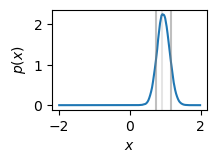

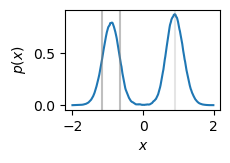

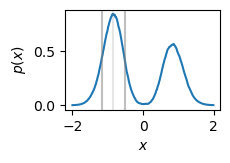

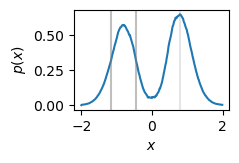

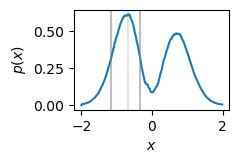

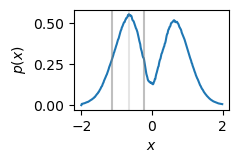

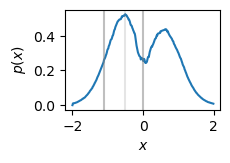

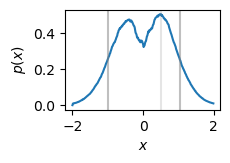

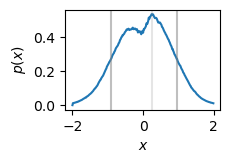

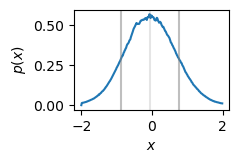

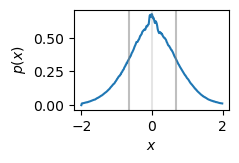

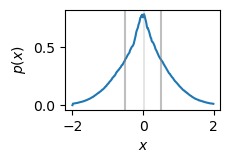

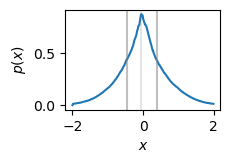

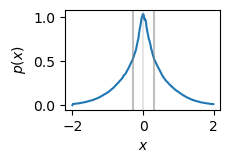

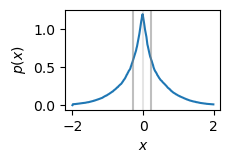

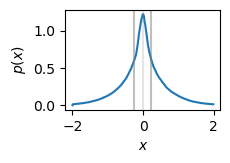

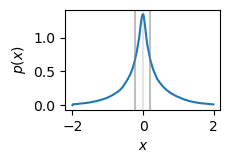

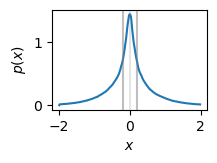

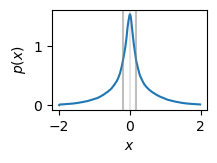

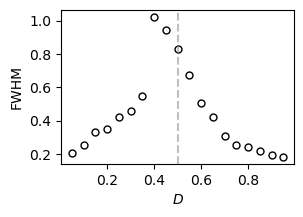

In [35]:
a = 1
D1, D2 = 0.45, 0.01
b = 1
T= 10000

dlist = np.arange(0.05, 1, 0.05)
fwhm_l = []

for d in dlist:

    #clear_output(wait=True)
    print("D = ", d)

    x, Pl = stat_den_sde_2(a, d, D2, T, f_doub_well, g_mon, 
                         dt=0.001, low=-2, lim=2, n=b, m=1.0, xinit=0.5, Nb=300, start=0.01)
    
    lower_x, upper_x = half_max_x(x, Pl)
    fwhm_l.append((upper_x - lower_x)/2)

    fig, ax = plt.subplots(1, 1, figsize=(2, 1.3))

    ax.plot(x, Pl)
    ax.axvline(lower_x, color='grey', alpha=0.5)
    ax.axvline(upper_x, color='grey', alpha=0.5)

    Pl_ = Pl.tolist()
    max_ = x[Pl_.index(max(Pl_))]
    ax.axvline(max_, color='grey', alpha=0.2)
    print("low = ", lower_x, ", upp = ", upper_x, ", max = ", max_)

    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$p(x)$")

    fig.savefig('/Users/tphillips/multiplicative_noise/pics/double/p_plot_double_'+str(d)+'_b'+str(b)+'_.png', bbox_inches='tight', format='png', dpi=90)

fig, ax = plt.subplots(1, 1, figsize=(3, 2))

fwhm_list = np.array(fwhm_l[0:])
ax.plot(dlist[0:], fwhm_list[0:], 'wo', markersize=5, mec = 'k')
ax.set_xlabel(r'$D$')
ax.set_ylabel('FWHM') 
ax.axvline(0.5, ls='--', color='grey', alpha=0.5)

fig.savefig('/Users/tphillips/multiplicative_noise/pics/double/double_fwhm_b'+str(b)+'.png', bbox_inches='tight', format='png', dpi=120)

/var/folders/4_/_kn88xdj4jxfys_fs3w8_rlc0000gp/T/ipykernel_28955/2871514598.py:65: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[0,2].grid(b=True, which='minor', color='grey', linestyle='--', alpha=0.5)
/var/folders/4_/_kn88xdj4jxfys_fs3w8_rlc0000gp/T/ipykernel_28955/2871514598.py:123: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[1,2].grid(b=True, which='minor', color='grey', linestyle='--', alpha=0.5)


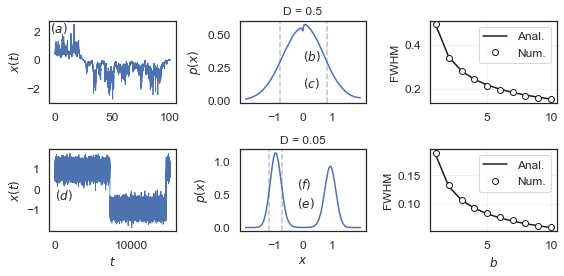

In [88]:
# all together
# plot 3 together

fig, ax = plt.subplots(2, 3, figsize=(8, 4))

#a, b = 1, 1
D1, D2 = 0.5, 0.001
#T = 100
#tl_ld, Xl_ld = SDE_ev(a, D1, D2, T, f_doub_well, g_mon, 
#                      dt=0.0001, n=b, m=1.0, xinit=0.5, osc=False, steps=100) 

ax[0,0].plot(tl_ld, Xl_ld, 'b', linewidth=0.8) 
ax[0,1].set_title("D = {}".format(D1))
#ax[0,0].set_xlabel(r"$t$")
ax[0,0].set_ylabel(r"$x(t)$")
#ax[0,0].set_yticks([-1,0,1])
ax[0,0].annotate(r"$(a)$", (-4,1.9))

#T=200000
#x_ld, Pl_ld = stat_den_sde(a, D1, D2, T, f_doub_well, g_mon, 
#                     dt=0.001, low=-2, lim=2, n=b, m=1.0, xinit=-0.5, Nb=300, start=0)

lower_x, upper_x = half_max_x(x_ld, Pl_ld)
ax[0,1].axvline(lower_x, linestyle='--', color='grey', alpha=0.5)
ax[0,1].axvline(upper_x, linestyle='--', color='grey', alpha=0.5)

ax[0,1].plot(x_ld, Pl_ld)
#ax[0,1].set_xlabel(r"$x$")
ax[0,1].set_ylabel(r"$p(x)$")
ax[0,1].set_xticks([-1,0,1])
ax[0,1].annotate(r"$(b)$", (0,0.3))

#fig.tight_layout()
#save = 'stat_dist_double_well_unstablemax_mnoise_a1_D0p5_T10000_3'
#fig.savefig('/Users/tphillips/multiplicative_noise/pics/'+save+'.png', bbox_inches='tight', format='png', dpi=120)

#

#a = 1
#D1, D2 = 0.45, 0
#T= 10000 

#blist = np.arange(1, 11, 1)
#fwhm_ld = []

#for b in blist:

#    clear_output(wait=True)
#    print("b = ", b)

#    x, Pl = stat_den_sde(a, D1, D2, T, f_doub_well, g_mon, 
#                         dt=0.001, low=-2, lim=2, n=b, m=1.0, xinit=0.5, Nb=300, start=0)
#    lower_x, upper_x = half_max_x(x, Pl)
#    fwhm_ld.append((upper_x - lower_x)/2)

#theo_ld = [1/(b**0.5) for b in blist]

c = fwhm_ld[3]/theo_ld[3]
ax[0,2].plot(blist[0:], c*np.array(theo_ld[0:]), 'k', label='Anal.')
ax[0,2].plot(blist[0:], fwhm_ld[0:], 'wo', markersize=6, mec = 'k', label='Num.')
#ax[0,2].set_xlabel(r'$b$')
ax[0,2].set_ylabel('FWHM')
ax[0,1].annotate(r"$(c)$", (0,0.1))
ax[0,2].grid(alpha=0.3)
ax[0,2].grid(b=True, which='minor', color='grey', linestyle='--', alpha=0.5)
ax[0,2].legend()

#

#a, b = 1, 1
D1, D2 = 0.05, 0.02
#T = 15000

#tl_sd, Xl_sd = SDE_ev(a, D1, D2, T, f_doub_well, g_mon, dt=0.0001, n=b, m=1.0, xinit=0.5, osc=False, steps=100) 
ax[1,0].plot(tl_sd, Xl_sd, 'b', linewidth=0.8) 
ax[1,1].set_title("D = {}".format(D1))
ax[1,0].set_xlabel(r"$t$")
ax[1,0].set_ylabel(r"$x(t)$")
ax[1,0].set_yticks([-1,0,1])
ax[1,0].annotate(r"$(d)$", (0,-0.5))

#T=60000
#x_sd, Pl_sd = stat_den_sde(a, D1, D2, T, f_doub_well, g_mon, dt=0.001, low=-2, lim=2, n=b, m=1.0, xinit=-0.5, Nb=300, start=0)

lower_x, upper_x = half_max_x(x_sd, Pl_sd)
ax[1,1].axvline(lower_x, linestyle='--', color='grey', alpha=0.5)
ax[1,1].axvline(upper_x, linestyle='--', color='grey', alpha=0.5)

ax[1,1].plot(x_sd, Pl_sd)
ax[1,1].set_xlabel(r"$x$")
ax[1,1].set_ylabel(r"$p(x)$")
ax[1,1].set_xticks([-1,0,1])
ax[1,1].annotate(r"$(e)$", (-0.2,0.3))

#save = 'bound_x_1_om_m0p1_D0p1_T40000'

#

#D1, D2 = 0.05, 0
#a = 1
#T=10000

#fwhm_sd = []

#for b in blist:
#    clear_output(wait=True)
#    print("b = ", b)

#    x, Pl = stat_den_sde(a, D1, D2, T, f_doub_well, g_mon, dt=0.001, low=-2, lim=2, n=b, m=1.0, xinit=-0.5, Nb=300, start=0)
#    lower_x, upper_x = half_max_x(x, Pl)
#    fwhm_sd.append((upper_x - lower_x)/2)

#theo_sd = [1/(b**0.5) for b in blist]

c = fwhm_sd[3]/theo_sd[3]
#ax.plot(blist[3:], c*np.array(theo_l[3:]), 'k', label='Anal.')
#ax.plot(blist[3::5], fwhm_l[3::5], 'wo', markersize=6, mec = 'k', label='Num.')
ax[1,2].plot(blist[0:], c*np.array(theo_sd[0:]), 'k', label='Anal.')
ax[1,2].plot(blist[0:], fwhm_sd[0:], 'wo', markersize=6, mec = 'k', label='Num.')
ax[1,2].set_xlabel(r'$b$')
ax[1,2].set_ylabel('FWHM')
ax[1,2].grid(alpha=0.3)
ax[1,2].grid(b=True, which='minor', color='grey', linestyle='--', alpha=0.5)
ax[1,1].annotate(r"$(f)$", (-0.2,0.6))
ax[1,2].legend()

fig.tight_layout()
save = 'fwhm_double_well_mnoise_all_a1_b1_D0p05_0p5'
fig.savefig('/Users/tphillips/multiplicative_noise/pics/'+save+'.png', bbox_inches='tight', format='png', dpi=160)